<center>
<strong><b><font size="5">Time Series 01 ~ Preprocessing & Visualisasi</font></b></strong>
<img alt="" src="images/covers/taudata-cover.jpg"/>
</center>

# Outline

* String to DateTime
* DateTime Operations
* Time Series Visualizations

In [66]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab
    IN_COLAB = True
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Pedas-2024---Forecasting/master/data/stock_data.csv
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded


# DateTime Formats

<img alt="" src="images/dateTime_Formats.png"/>

# DateTime Universal Codes

<img alt="" src="images/dateTime_Formats_Codes.png"/>

## Very Good Reference: https://www.foragoodstrftime.com/

In [67]:
# Rubah Teks ke DateTime Format 
from datetime import datetime
# %a %b %d %l %m %M %z %Y https://www.foragoodstrftime.com/

d1 = 'Nov 4 2022  1:33PM'
d1 = datetime.strptime(d1, '%b %d %Y %I:%M%p')
d2 = 'Jun 1 2004  1:33PM'
d2 = datetime.strptime(d2, '%b %d %Y %I:%M%p')
d1, d2

(datetime.datetime(2022, 11, 4, 13, 33), datetime.datetime(2004, 6, 1, 13, 33))

In [68]:
d5 = 'Feb 30 2023'
try:
    d5 = datetime.strptime(d5, '%b %d %Y')
    d5
except Exception as err_:
    print("Error:", err_)

Error: day is out of range for month


In [69]:
d1

datetime.datetime(2022, 11, 4, 13, 33)

In [70]:
d1.day

4

In [71]:
print(dir(d1))

['__add__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', 'astimezone', 'combine', 'ctime', 'date', 'day', 'dst', 'fold', 'fromisocalendar', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'now', 'replace', 'resolution', 'second', 'strftime', 'strptime', 'time', 'timestamp', 'timetuple', 'timetz', 'today', 'toordinal', 'tzinfo', 'tzname', 'utcfromtimestamp', 'utcnow', 'utcoffset', 'utctimetuple', 'weekday', 'year']


In [72]:
# weekday 0=Senin, 1=Selasa, 2=Rabu, ... dst
d1.minute, d1.hour, d1.weekday(), d1.day, d1.month, d1.year

(33, 13, 4, 4, 11, 2022)

In [73]:
hari_ = {0:"Senin", 1:"Selasa", 2:"Rabu", 3:"Kamis", 4:"Jumat", 5:"Sabtu", 6:"Minggu"}
hari_[d1.weekday()]

'Jumat'

In [74]:
# Cara lain (Menggunakan module tambahan)
import calendar

calendar.day_name[d1.weekday()]

'Friday'

# Hari/Saat ini?

In [75]:
today = datetime.today()
today

datetime.datetime(2024, 11, 16, 14, 4, 10, 562770)

In [76]:
s = today.strftime('%Y-%m-%d %H:%M:%S')
type(s), s

(str, '2024-11-16 14:04:10')

# Operasi pada variabel datetime

In [77]:
# Mana yang lebih dahulu
d1 = datetime.strptime('Apr 28 2021  1:33PM', '%b %d %Y %I:%M%p')
d2 = datetime.strptime('Apr 27 2021  1:33PM', '%b %d %Y %I:%M%p')

d1<d2, d1>d2, d1==d2, d1<=d2

(False, True, False, False)

In [78]:
# Menjumlahkan waktu: Contoh kasus Google Map/Ojol
import datetime as dm # ==> hati-hati disini!!!...

d3 = today + dm.timedelta(days=0, seconds=33, minutes=14, hours=2, weeks=1 ) # days, seconds, then other fields.
print(today)
print(d3)

2024-11-16 14:04:10.562770
2024-11-23 16:18:43.562770


# Konsekuensi dari DateTime ==> Sekarang kita bisa mengurutkan dengan benar

In [79]:
Waktu = [d3, d2, d1]
print(Waktu)
Waktu.sort() # Hati-hati ini "inplace"
print(Waktu)

[datetime.datetime(2024, 11, 23, 16, 18, 43, 562770), datetime.datetime(2021, 4, 27, 13, 33), datetime.datetime(2021, 4, 28, 13, 33)]
[datetime.datetime(2021, 4, 27, 13, 33), datetime.datetime(2021, 4, 28, 13, 33), datetime.datetime(2024, 11, 23, 16, 18, 43, 562770)]


# Datetime di Pandas

## References:

* https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01
* https://machinelearningmastery.com/time-series-data-visualization-with-python/
* https://datascienceanywhere.medium.com/visualizing-time-series-data-in-python-e49fa5d10ea
* Dataset: https://github.com/rashida048/Datasets/blob/master/stock_data.csv

In [80]:
import pandas as pd

fileData = 'data/stock_data.csv'
df = pd.read_csv(fileData)
print(df.shape)
df.head()

(3019, 7)


,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [81]:
df.Name.unique()

array(['AABA'], dtype=object)

In [82]:
df.tail()

,Date,Open,High,Low,Close,Volume,Name
3014,12/22/2017,71.42,71.87,71.22,71.58,10979165,AABA
3015,12/26/2017,70.94,71.39,69.63,69.86,8542802,AABA
3016,12/27/2017,69.77,70.49,69.69,70.06,6345124,AABA
3017,12/28/2017,70.12,70.32,69.51,69.82,7556877,AABA
3018,12/29/2017,69.79,70.13,69.43,69.85,6613070,AABA


In [83]:
set(df['Name'])

{'AABA'}

In [84]:
# Penting untuk cek Tipe Data Dataframe
# Perhatikan disini tipe data "Date" masih berupa string!!!....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [85]:
# Perhatikan sekarang "Date" tidak lagi berupa variable, tapi merupakan index bagi dataframenya
df = pd.read_csv(fileData, parse_dates=True, index_col = "Date")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [86]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [87]:
# Karena kita gunakan waktu sebagai index, maka kita bisa mudah dalam melakukan "slice" ke data
df.loc['2007']

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2007-01-03,25.85,26.26,25.26,25.61,26654067,AABA
2007-01-04,25.64,26.92,25.52,26.85,32565729,AABA
2007-01-05,26.70,27.87,26.66,27.74,64391379,AABA
2007-01-08,27.70,28.04,27.43,27.92,25716348,AABA
2007-01-09,28.00,28.05,27.41,27.58,25624340,AABA
...,...,...,...,...,...,...
2007-12-24,24.01,24.19,23.94,24.05,24861780,AABA
2007-12-26,23.85,24.25,23.85,23.96,9821600,AABA
2007-12-27,23.60,24.15,23.57,23.71,16041411,AABA


In [88]:
df.loc['2008'].describe()

,Open,High,Low,Close,Volume
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,21.188024,21.598419,20.711423,21.154901,3.382231e+07
std,6.155015,6.130325,6.158524,6.162605,3.741571e+07
min,9.100000,9.480000,8.940000,8.950000,2.507850e+06
25%,17.150000,17.310000,16.800000,16.880000,1.781872e+07
50%,21.590000,21.900000,20.850000,21.370000,2.605880e+07
75%,27.420000,27.780000,26.910000,27.330000,3.664298e+07
max,29.980000,30.250000,29.750000,29.980000,4.382317e+08


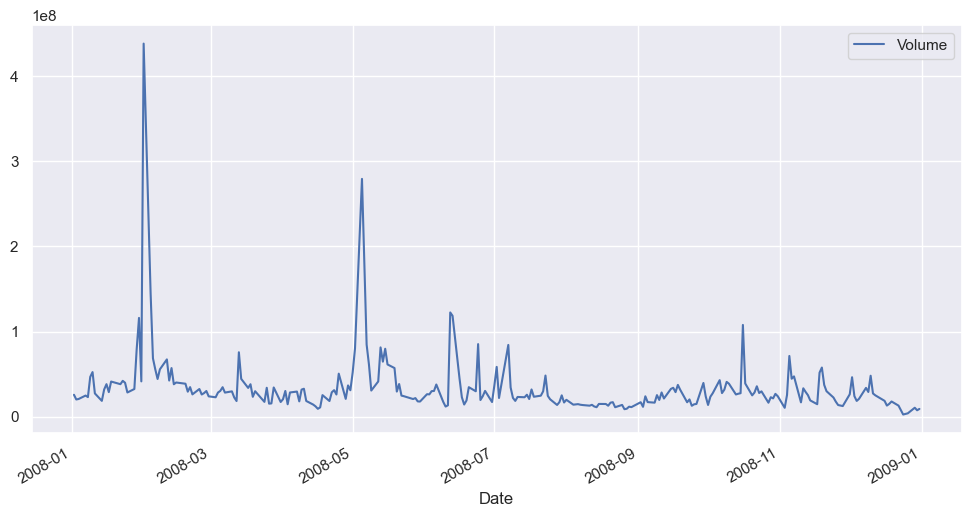

In [89]:
# Basic Line Plot
p = df.loc['2008'][['Volume']].plot(figsize=(12,6))
# Perhatikan "makna" df['volume']

# SeaBorn

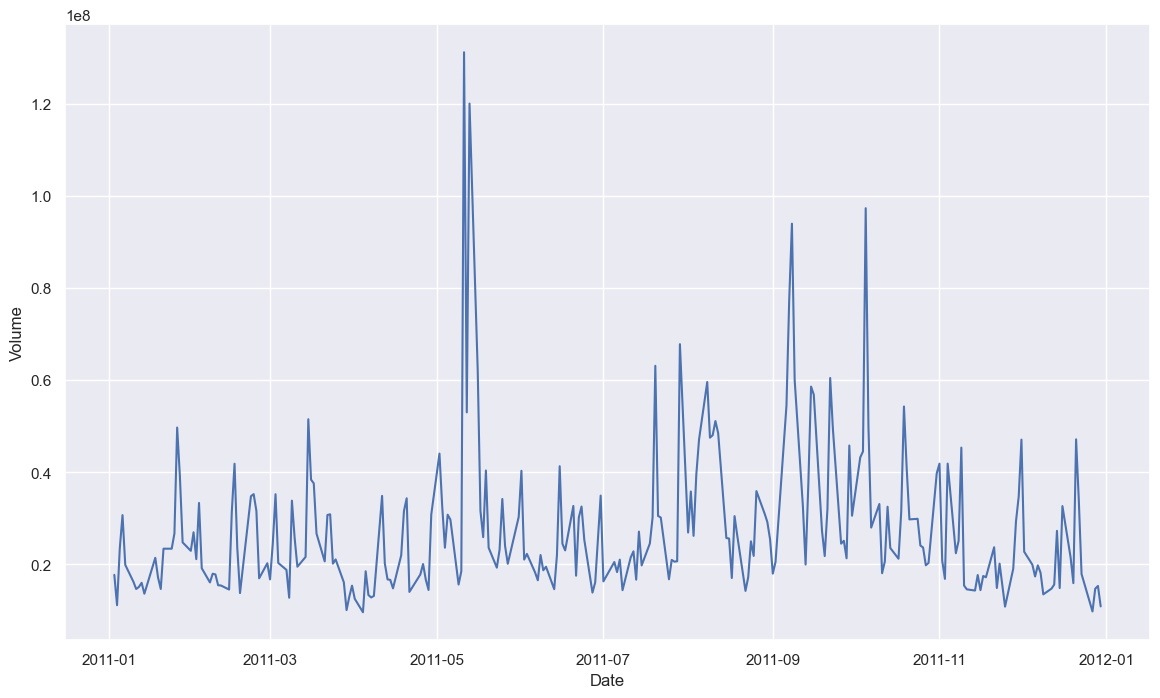

In [90]:
# Warning Slower .... 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

plt.figure(figsize=(14, 8))
p = sns.lineplot(x='Date', y='Volume', data=df.loc['2011'])
plt.show()

# Hue : Let's add days

In [91]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [92]:
# Bisa menggunakan Fungsi "Map": silahkan dicoba sebagai latihan

df['weekdays'] = ""
for i, d in df.iterrows():
    df.loc[i,'weekdays'] =  hari_[i.weekday()] # Perhatikan disini menggunakan i dan bukan d.Date karena waktu=index
    
df.head()

,Open,High,Low,Close,Volume,Name,weekdays
Date,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin


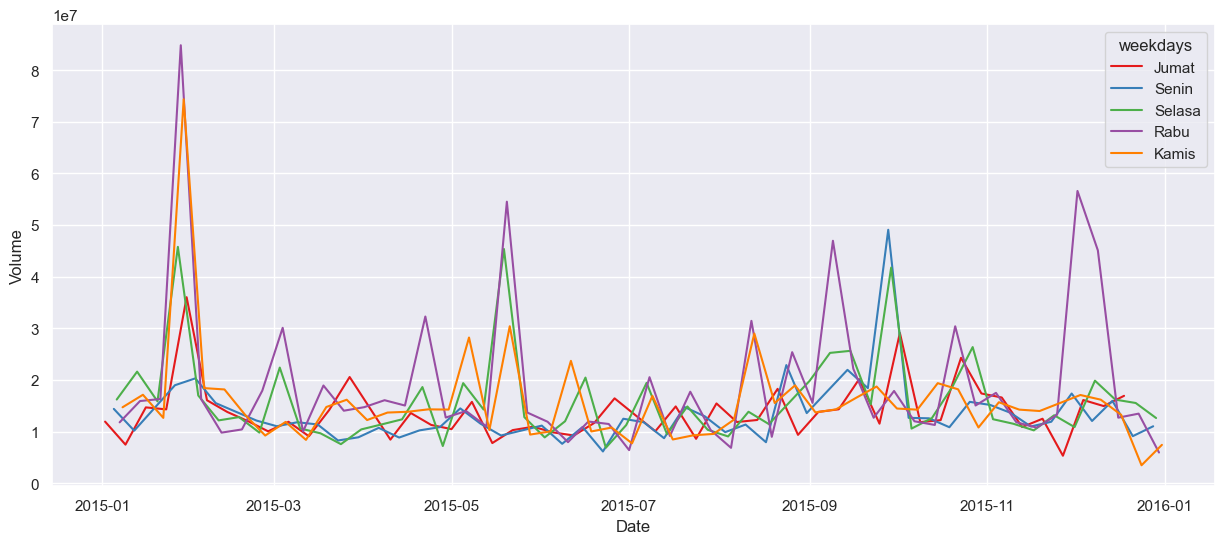

In [93]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Volume', data=df.loc['2015'], hue='weekdays', palette='Set1')
plt.show()
# We have our first insight!!!...

# SubPlot

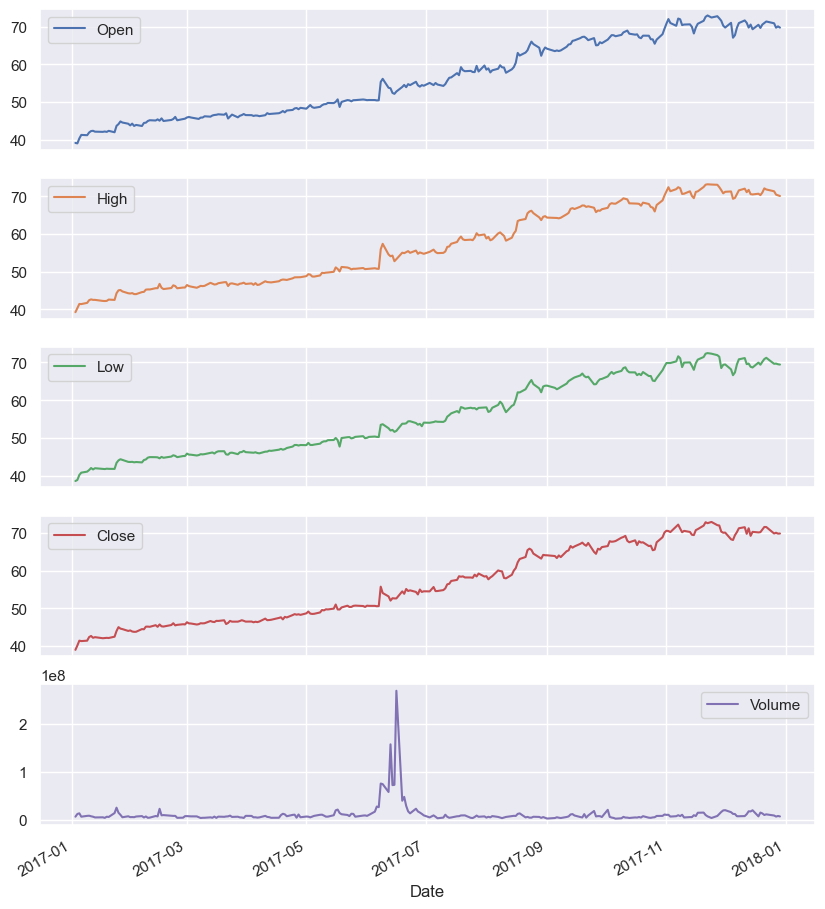

In [94]:
p = df.loc['2017'].plot(subplots=True, figsize=(10,12))

# Resampling

* Resampling berdasarkan bulan (month)
* Filter tahun >2016

In [95]:
# Reduce
df_month = df.select_dtypes(include='number').resample("ME").mean() # dirata-ratakan perbulan. hati-hati hanya bisa jika "waktu" adalah index
df_month
# Perhatikan Date mulai 2006

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-31,38.245500,38.694000,37.641500,38.113000,3.400594e+07
2006-02-28,33.141579,33.436842,32.627368,32.975789,2.329848e+07
2006-03-31,31.333478,31.696957,30.929130,31.218696,2.095522e+07
2006-04-30,32.383684,32.790000,31.914737,32.283158,2.200768e+07
2006-05-31,31.744545,32.175455,31.171364,31.517273,2.218047e+07
...,...,...,...,...,...
2017-08-31,61.336522,61.964348,60.763478,61.434783,5.878167e+06
2017-09-30,65.530000,66.081000,65.013500,65.538000,6.951704e+06
2017-10-31,67.611364,68.184091,67.093636,67.637727,5.671722e+06


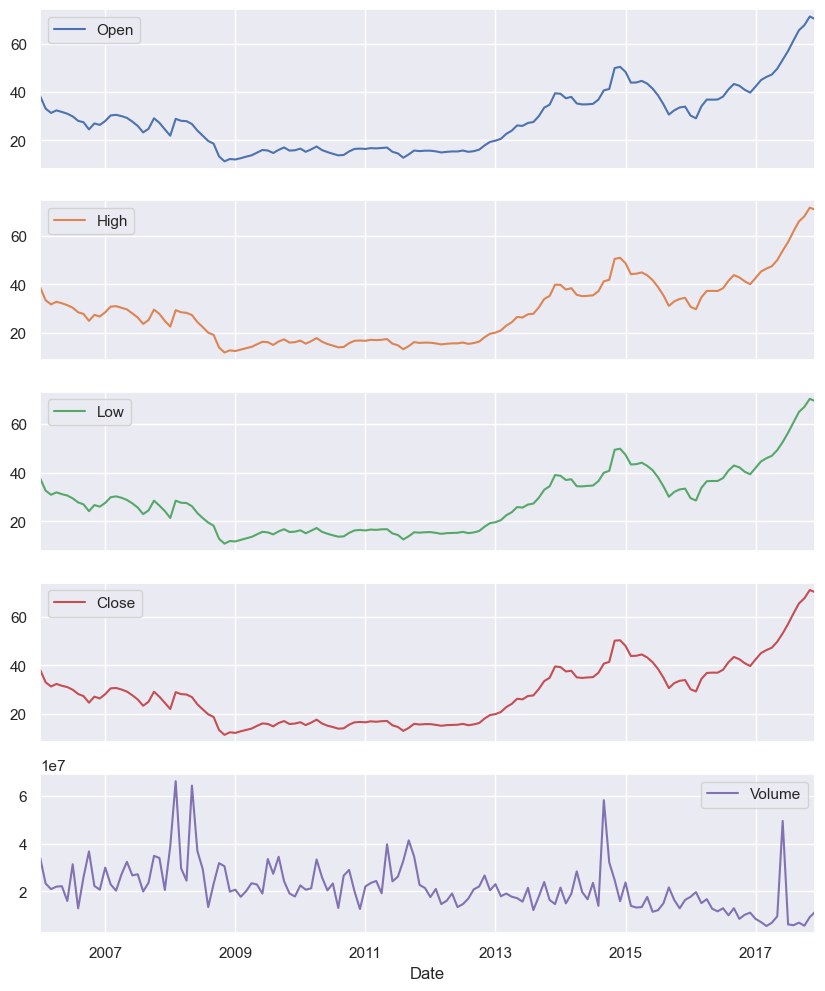

In [96]:
p = df_month.plot(subplots=True, figsize=(10,12))

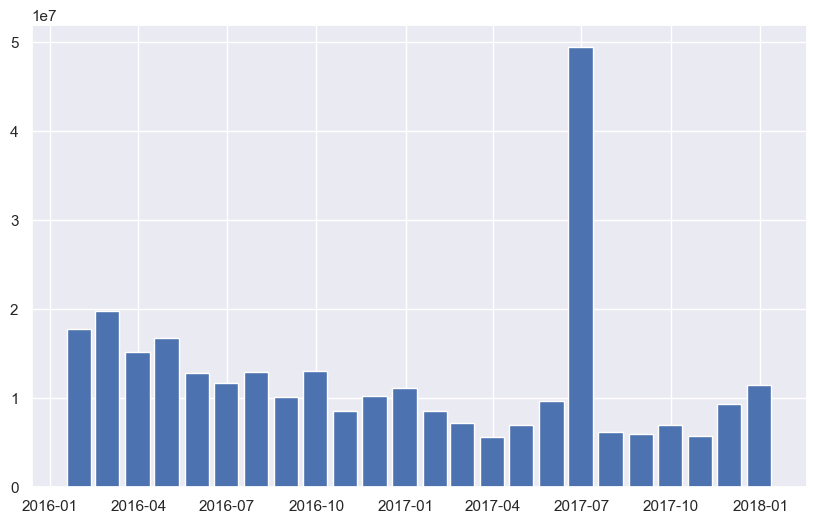

In [97]:
import matplotlib.dates as mdates # Need this additional function

fig, ax = plt.subplots(figsize=(10, 6))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Supaya label lebih jelas
ax.bar(df_month['2016':].index, df_month.loc['2016':, "Volume"], width=25, align='center')

plt.show()

# Seaborn & Seasonality

* Butuh Kolom baru "Month"

In [98]:
df

,Open,High,Low,Close,Volume,Name,weekdays
Date,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin
...,...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA,Jumat
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA,Selasa
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA,Rabu


In [99]:
# Latihan: ganti dengan "map" function
df['Month'] = ""
for i,d in df.iterrows():
    df.loc[i,'Month'] =  i.month # Perhatikan disini menggunakan i dan bukan d.Date karena waktu=index
    
df

,Open,High,Low,Close,Volume,Name,weekdays,Month
Date,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa,1
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu,1
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis,1
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat,1
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin,1
...,...,...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA,Jumat,12
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA,Selasa,12
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA,Rabu,12


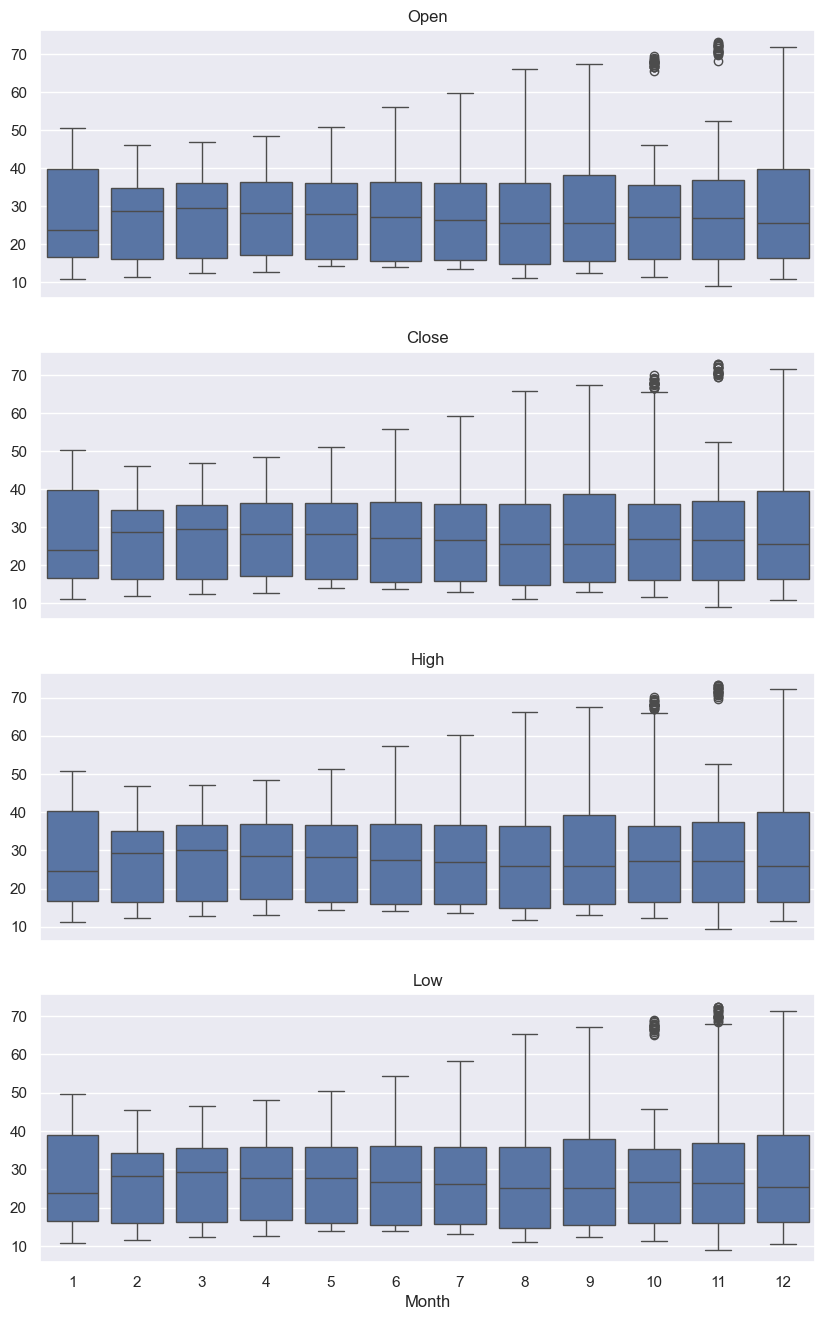

In [100]:
#start, end = '2016-01', '2016-12'
fig, axes = plt.subplots(4, 1, figsize=(10, 16), sharex=True)

for name, ax in zip(['Open', 'Close', 'High', 'Low'], axes):
    sns.boxplot(data = df, x='Month', y=name, ax=ax)
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

# Line Plot Revisited with resampling

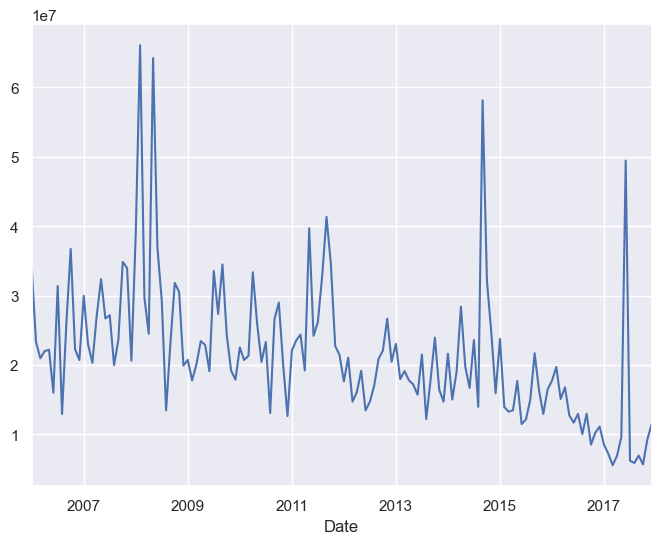

In [101]:
p = df_month['Volume'].plot(figsize=(8, 6))

# Resampling bisa juga berdasarkan minggu (dan contrasted with daily)

* Perhatikan Business understanding dengan baik.

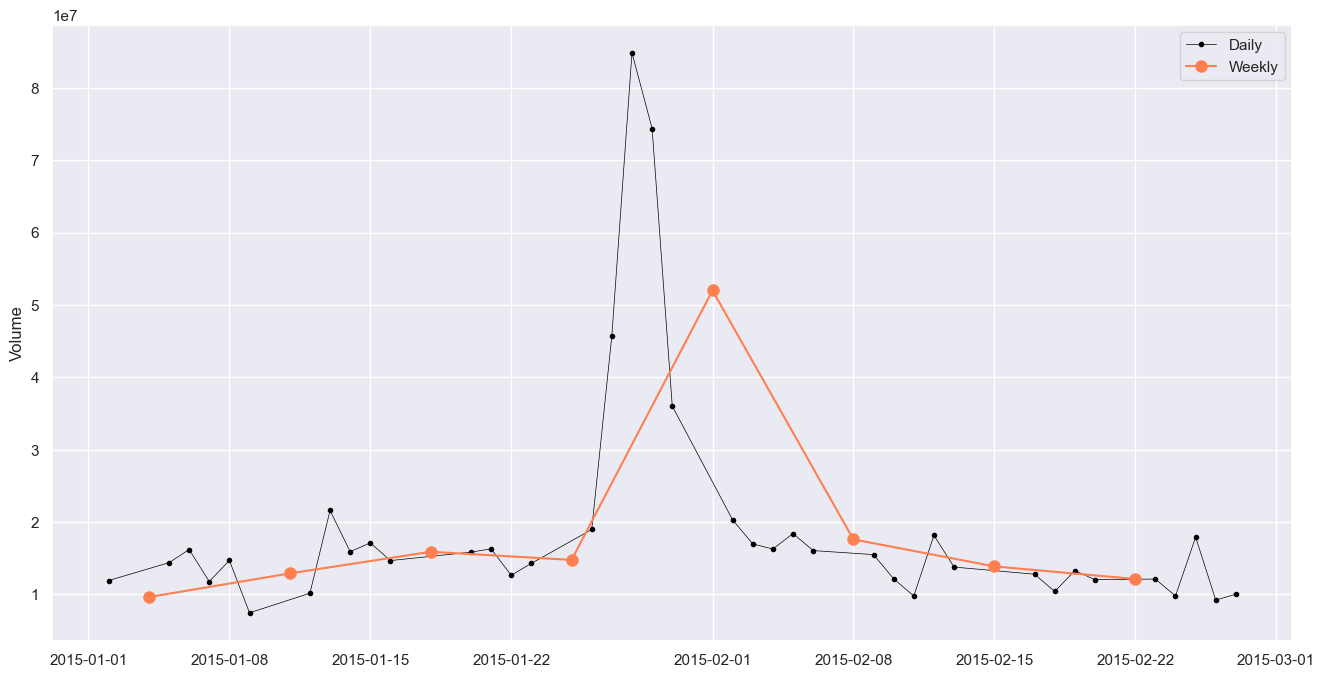

In [102]:
df_week = df.select_dtypes(include='number').resample("W").mean()

start, end = '2015-01', '2015-02'
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')

ax.set_ylabel("Volume")
ax.legend()
plt.show()

# Rolling?

<img alt="" src="images/rolling_MA_pandas.png"/>

* moving average, also called a rolling or running average is used to analyze the time-series data by calculating averages of different subsets of the complete dataset. Since it involves taking the average of the dataset over time, it is also called a moving mean (MM) or rolling mean.
* https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
* https://medium.com/@alexander.mueller/rolling-aggregations-on-time-series-data-with-pandas-80dee5893f9

In [103]:
# Contoh sederhana
import numpy as np

df2 = pd.DataFrame({'B': [0, 1, 2, 8, 4]})
print(df2)
df2.rolling(3, win_type='triang').mean()

   B
0  0
1  1
2  2
3  8
4  4


,B
0,NaN
1,NaN
2,1.00
3,3.25
4,5.50


In [104]:
df_7d_rolling = df.select_dtypes(include='number').rolling(window=7, center=False).mean() # Perhatikan centre = true !!!... 
df_7d_rolling.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN,NaN
2006-01-09,NaN,NaN,NaN,NaN,NaN
2006-01-10,NaN,NaN,NaN,NaN,NaN
2006-01-11,41.852857,42.532857,41.441429,42.127143,2.082691e+07
2006-01-12,42.171429,42.642857,41.722857,42.124286,2.006818e+07
2006-01-13,42.140000,42.525714,41.558571,41.971429,2.155571e+07


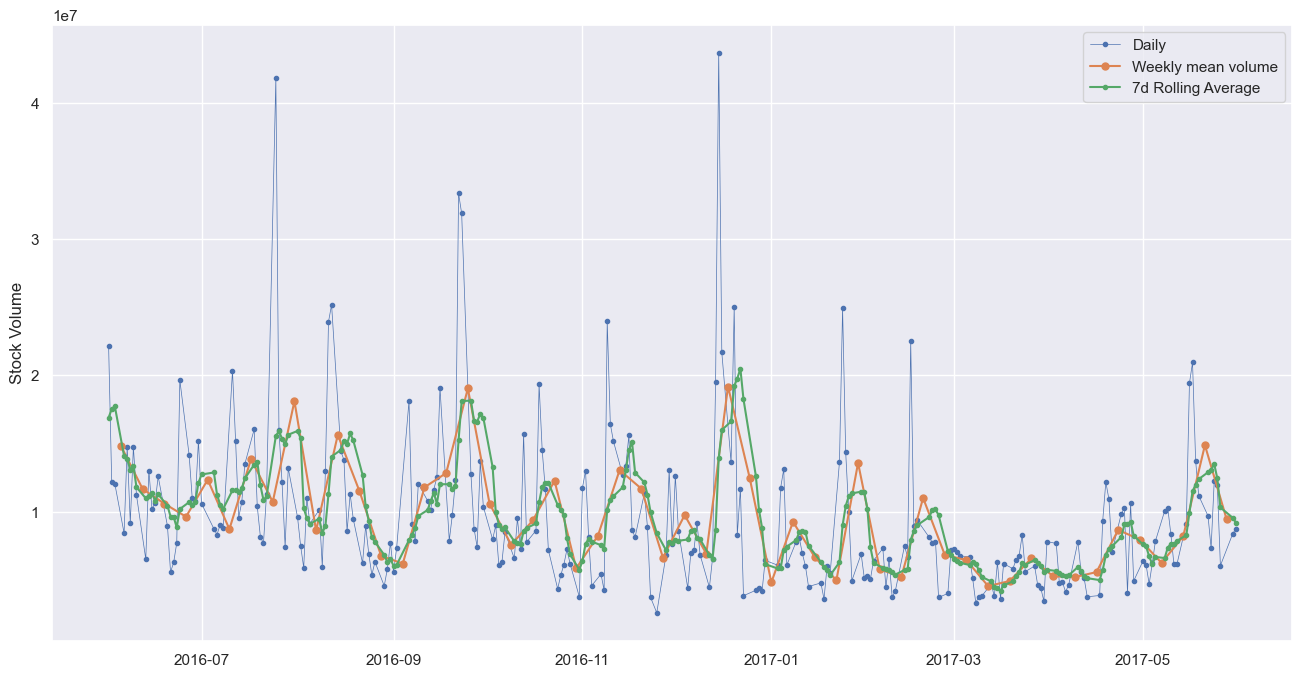

In [105]:
start, end = '2016-06', '2017-05'
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=5, 
        linestyle='-', label = 'Weekly mean volume')
ax.plot(df_7d_rolling.loc[start:end, 'Volume'], marker='.', linestyle='-', label='7d Rolling Average')

ax.set_ylabel('Stock Volume')
ax.legend()
plt.show()

# Memvisualisasikan Perubahan (Rasio dengan 1 hari sebelumnya)

* Menggunakan fungsi "Shift": The shift function shifts the data before or after the specified amount of time.
* https://pandas.pydata.org/docs/reference/api/pandas.Series.shift.html
* Fungsi Div (membagi), dalam hal ini dengan shift.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html
* https://www.geeksforgeeks.org/python-pandas-dataframe-shift/

In [106]:
df.head()

,Open,High,Low,Close,Volume,Name,weekdays,Month
Date,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa,1
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu,1
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis,1
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat,1
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin,1


In [107]:
df.shift().head()

,Open,High,Low,Close,Volume,Name,weekdays,Month
Date,,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,None,None,None
2006-01-04,39.69,41.22,38.79,40.91,24232729.0,AABA,Selasa,1
2006-01-05,41.22,41.90,40.77,40.97,20553479.0,AABA,Rabu,1
2006-01-06,40.93,41.73,40.85,41.53,12829610.0,AABA,Kamis,1
2006-01-09,42.88,43.57,42.80,43.21,29422828.0,AABA,Jumat,1


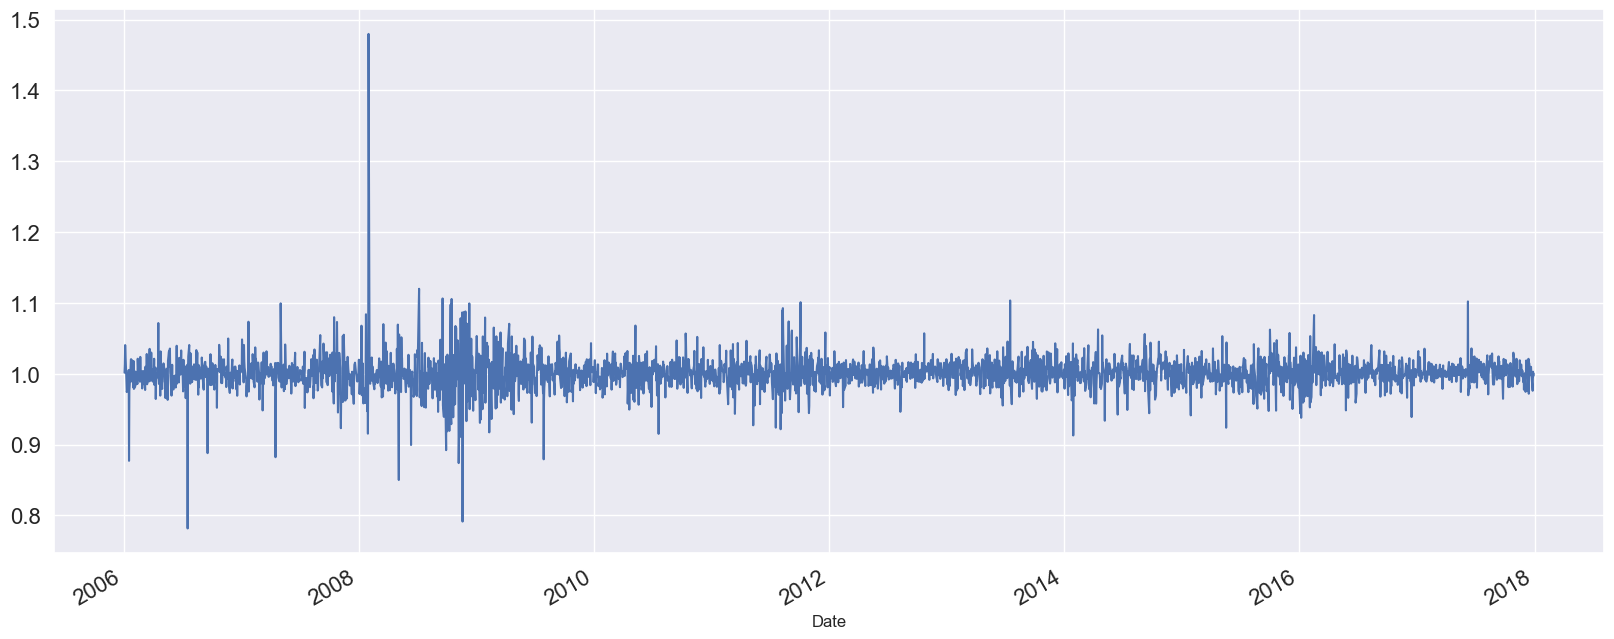

In [108]:
df['Change'] = df.Close.div(df.Close.shift())
p = df['Change'].plot(figsize=(20, 8), fontsize = 16)

In [109]:
df.head()

,Open,High,Low,Close,Volume,Name,weekdays,Month,Change
Date,,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa,1,NaN
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu,1,1.001467
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis,1,1.013669
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat,1,1.040453
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin,1,1.004860


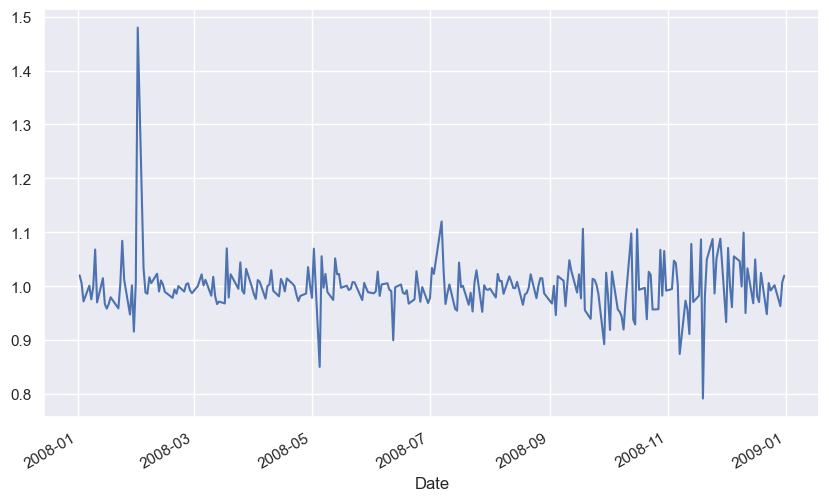

In [110]:
# Zoom to a year

p = df.loc['2008']['Change'].plot(figsize=(10, 6))

# Percent_Change

* Percentage change between the current and a prior element.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

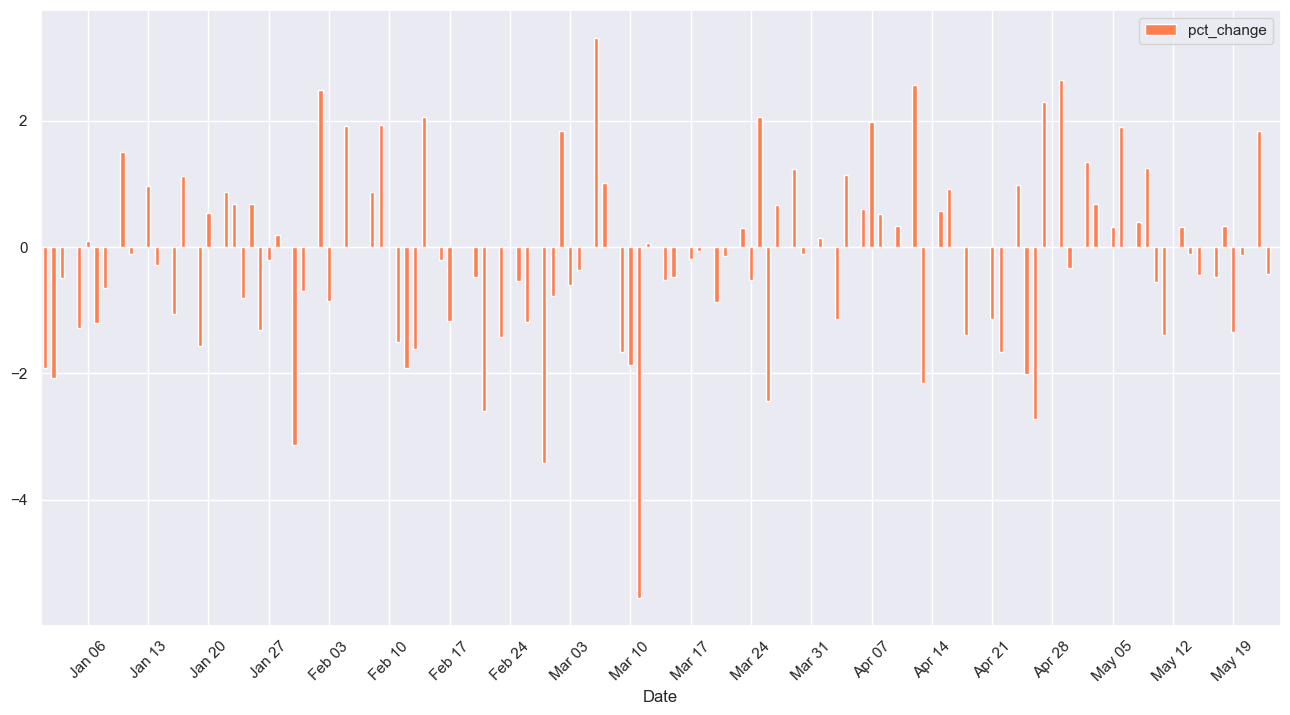

In [111]:
df_month.loc[:, 'pct_change'] = df.Close.pct_change()*100

fig, ax = plt.subplots(figsize=(16, 8))

df_month['pct_change' ].plot(kind='bar', color='coral', ax=ax)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
ax.legend()

plt.show()

# Differencing (Sangat penting di Statistika/Data science)

* First discrete difference of element.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

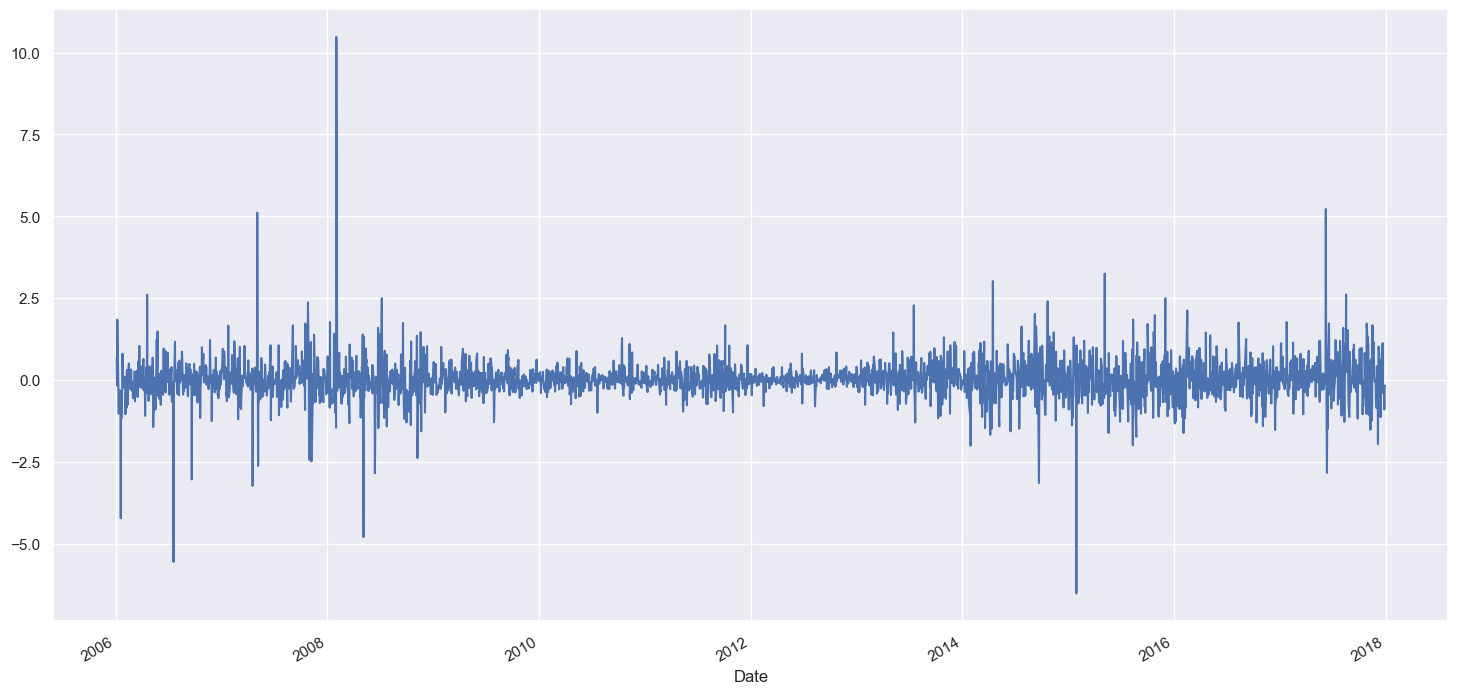

In [48]:
p = df.High.diff().plot(figsize=(18, 9))

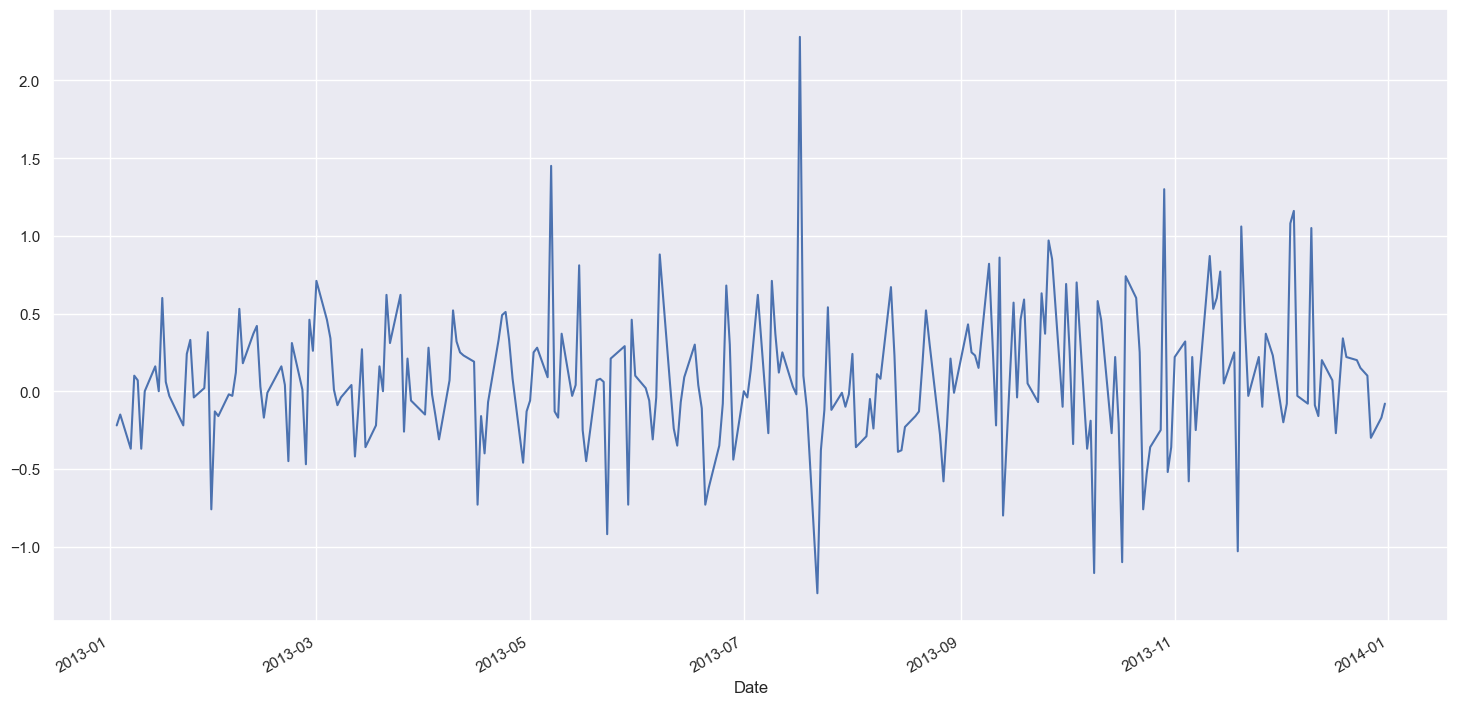

In [49]:
# Zoom
p = df.loc['2013'].High.diff().plot(figsize=(18, 9))

# Expanding Window: Akumulasi Data

* Bayangkan seperti jumlah total kasus Covid, tapi lebih fleksible karena bisa juga menggunakan rata-rata atau simpangan baku.
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html

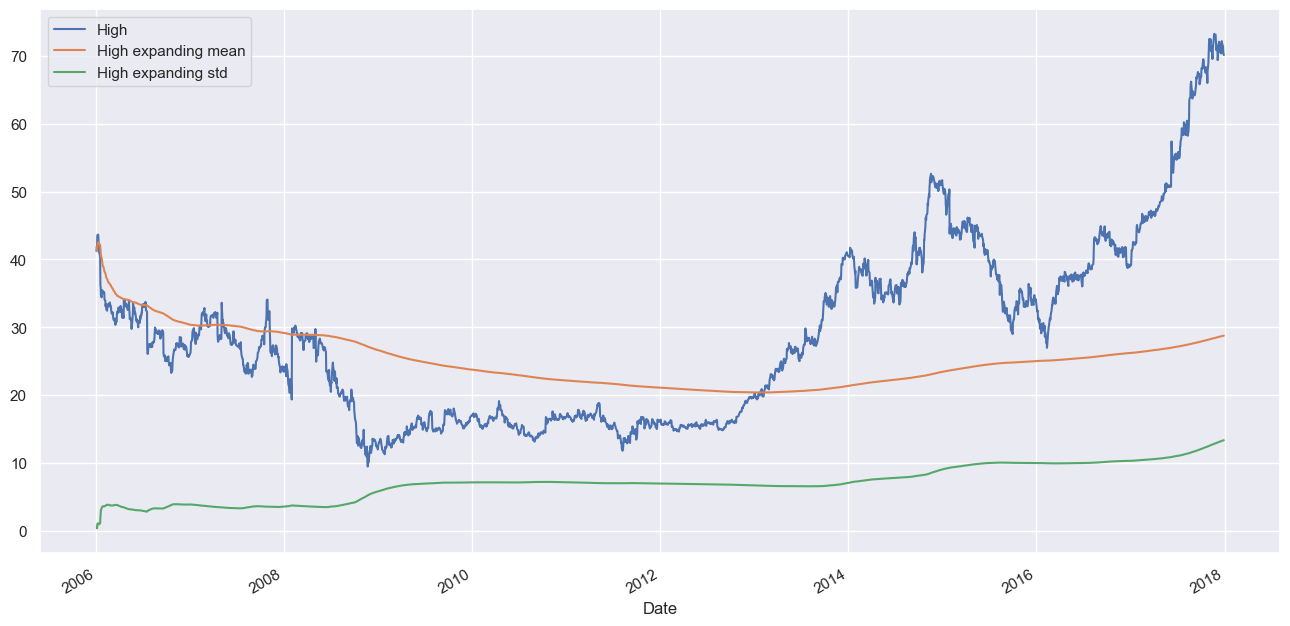

In [50]:
fig, ax = plt.subplots(figsize=(16, 8))

ax = df.High.plot(label='High')
ax = df.High.expanding().mean().plot(label='High expanding mean')
ax = df.High.expanding().std().plot(label='High expanding std')

ax.legend(); plt.show()

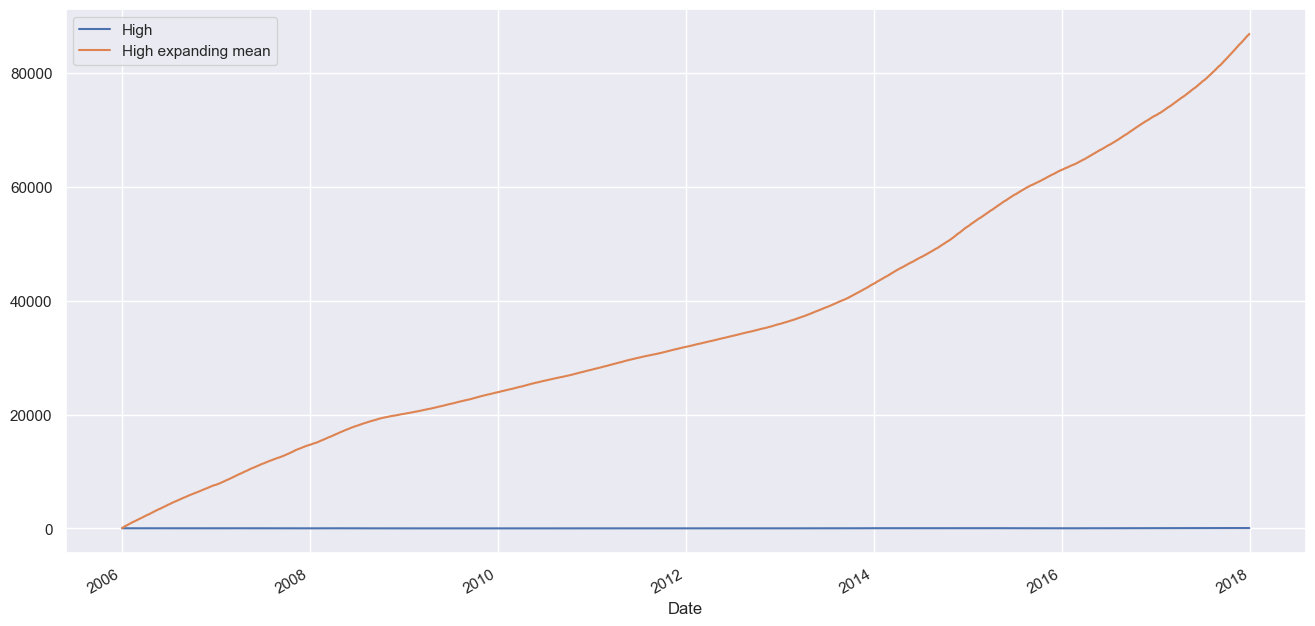

In [51]:
fig, ax = plt.subplots(figsize=(16, 8))

ax = df.High.plot(label='High')
ax = df.High.expanding().sum().plot(label='High expanding mean')
ax.legend(); plt.show()

# Hati-hati skala data ... Latihan: what to do?

# Heat Map

* Jauh lebih mudah untuk mendapatkan insight
* Butuh untuk menyesuaikan "Struktur Data"-nya.
* Butuh tambahan kolom "Year
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
* https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [112]:
# Latihan: ganti dengan "map" function
df['Year'] = ""
for i,d in df.iterrows():
    df.loc[i,'Year'] =  i.year # Perhatikan disini menggunakan i dan bukan d.Date karena waktu=index
    
df.head()

,Open,High,Low,Close,Volume,Name,weekdays,Month,Change,Year
Date,,,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,Selasa,1,NaN,2006
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,Rabu,1,1.001467,2006
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,Kamis,1,1.013669,2006
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,Jumat,1,1.040453,2006
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,Senin,1,1.004860,2006


In [53]:
all_month_year_df = pd.pivot_table(df, values="Open",
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]] # name months
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df.head()

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
Jan,38.245500,27.990500,21.926667,12.084500,16.572105,16.441000,15.719500,19.866667,39.268571,48.310500,30.250526,42.256000,27.439336
Feb,33.141579,30.297368,28.884000,12.601053,15.252632,16.778421,15.445500,20.623684,37.397895,43.861579,29.107000,44.916316,27.321515
Mar,31.333478,30.549545,28.070000,13.255455,16.256087,16.663043,14.986818,22.673000,37.975238,43.929091,34.064545,46.230870,27.995209
Apr,32.383684,30.021000,27.930000,13.802381,17.462500,16.853500,15.231500,23.988636,35.254762,44.590476,36.873810,47.207895,28.401504
May,31.744545,29.288182,26.731905,14.903000,15.965000,17.020476,15.405000,26.160455,34.852857,43.475500,36.822381,49.645909,28.583543


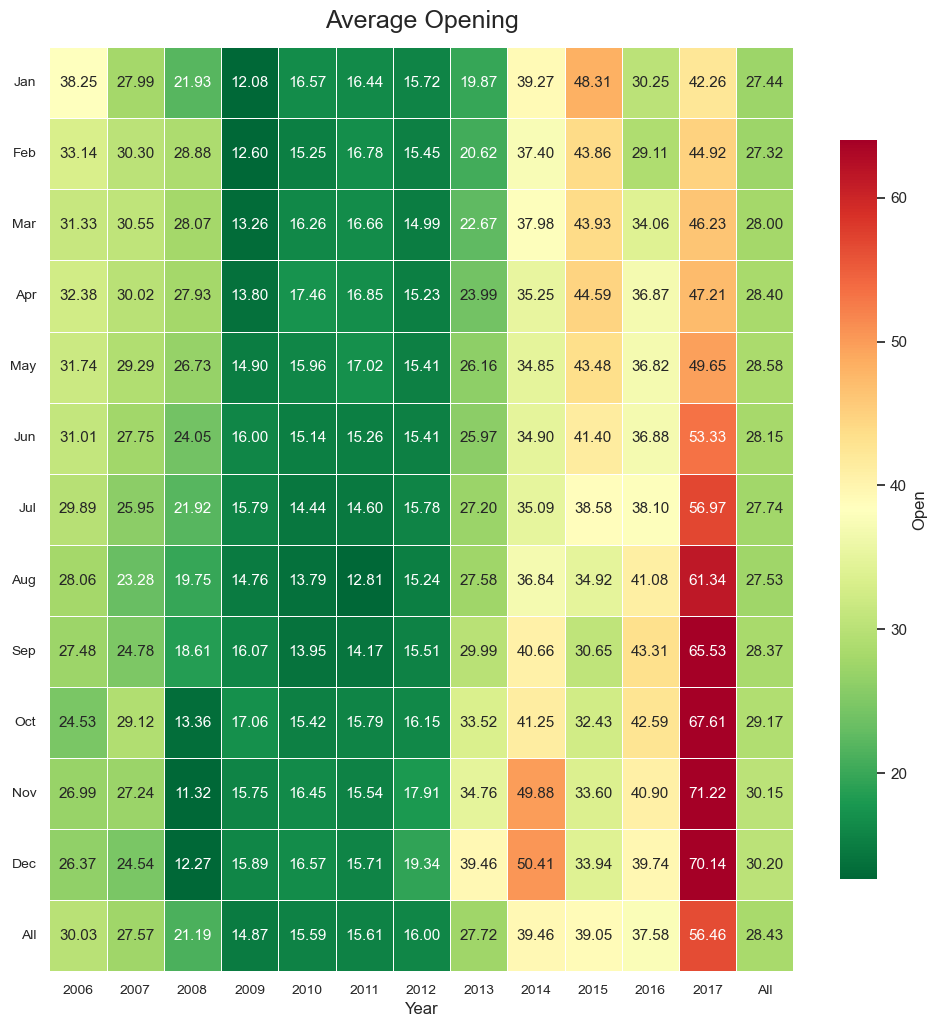

In [54]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(all_month_year_df, cmap='RdYlGn_r', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Open'}, ax=ax)                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Average Opening', fontdict={'fontsize':18},    pad=14);

plt.show()

# End of Module
<hr>
